In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

/Users/eternity/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Cargar el dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar los valores de píxeles para que estén entre 0 y 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Nombres de las clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


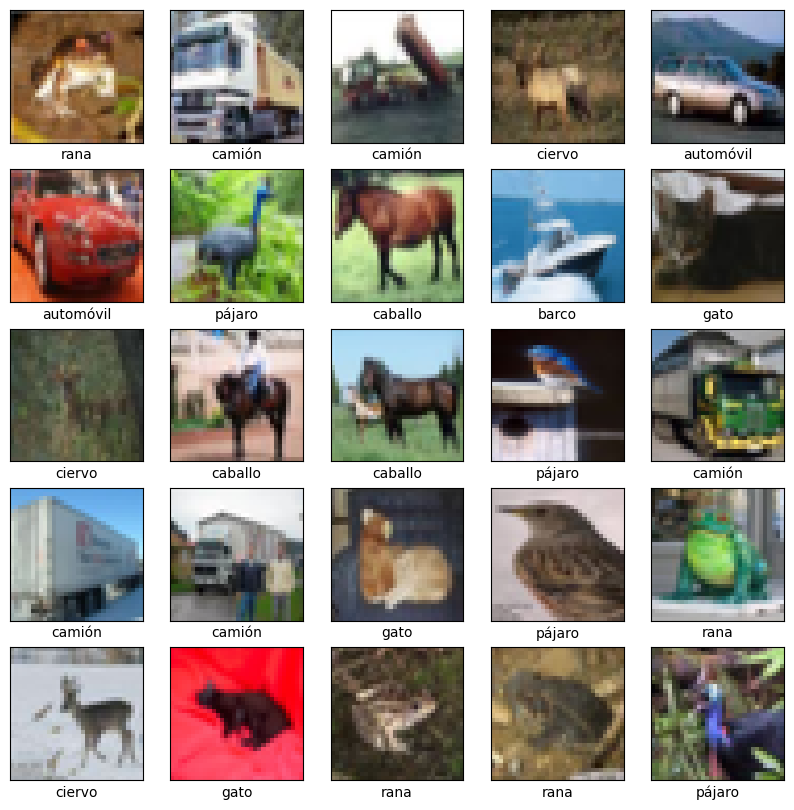

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential([
    # Capas convolucionales y de pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Aplanar la salida para las capas densas
    layers.Flatten(),
    
    # Capas densas (fully connected)
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 neuronas para las 10 clases
])

/Users/eternity/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3533 - loss: 1.7612 - val_accuracy: 0.5453 - val_loss: 1.2495
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5830 - loss: 1.1695 - val_accuracy: 0.6284 - val_loss: 1.0636
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6591 - loss: 0.9871 - val_accuracy: 0.6755 - val_loss: 0.9399
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6951 - loss: 0.8800 - val_accuracy: 0.6924 - val_loss: 0.8957
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7224 - loss: 0.7897 - val_accuracy: 0.7022 - val_loss: 0.8631
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7482 - loss: 0.7239 - val_accuracy: 0.7047 - val_loss: 0.8589
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7602 - loss: 0.6853 - val_accuracy: 0.7051 - val_loss: 0.8667
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7723 - 

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrecisión en el conjunto de prueba: {test_acc*100:.2f}%')

313/313 - 1s - 4ms/step - accuracy: 0.7141 - loss: 0.8839

Precisión en el conjunto de prueba: 71.41%


In [8]:
# Añadir una capa softmax para convertir los logits en probabilidades
probability_model = tf.keras.Sequential([model, layers.Softmax()])

predictions = probability_model.predict(test_images)

# Mostrar la primera predicción
predicted_label = np.argmax(predictions[0])
true_label = test_labels[0][0]
print(f'Predicción: {class_names[predicted_label]} (Confianza: {np.max(predictions[0]):.2f})')
print(f'Etiqueta verdadera: {class_names[true_label]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Predicción: gato (Confianza: 0.95)
Etiqueta verdadera: gato


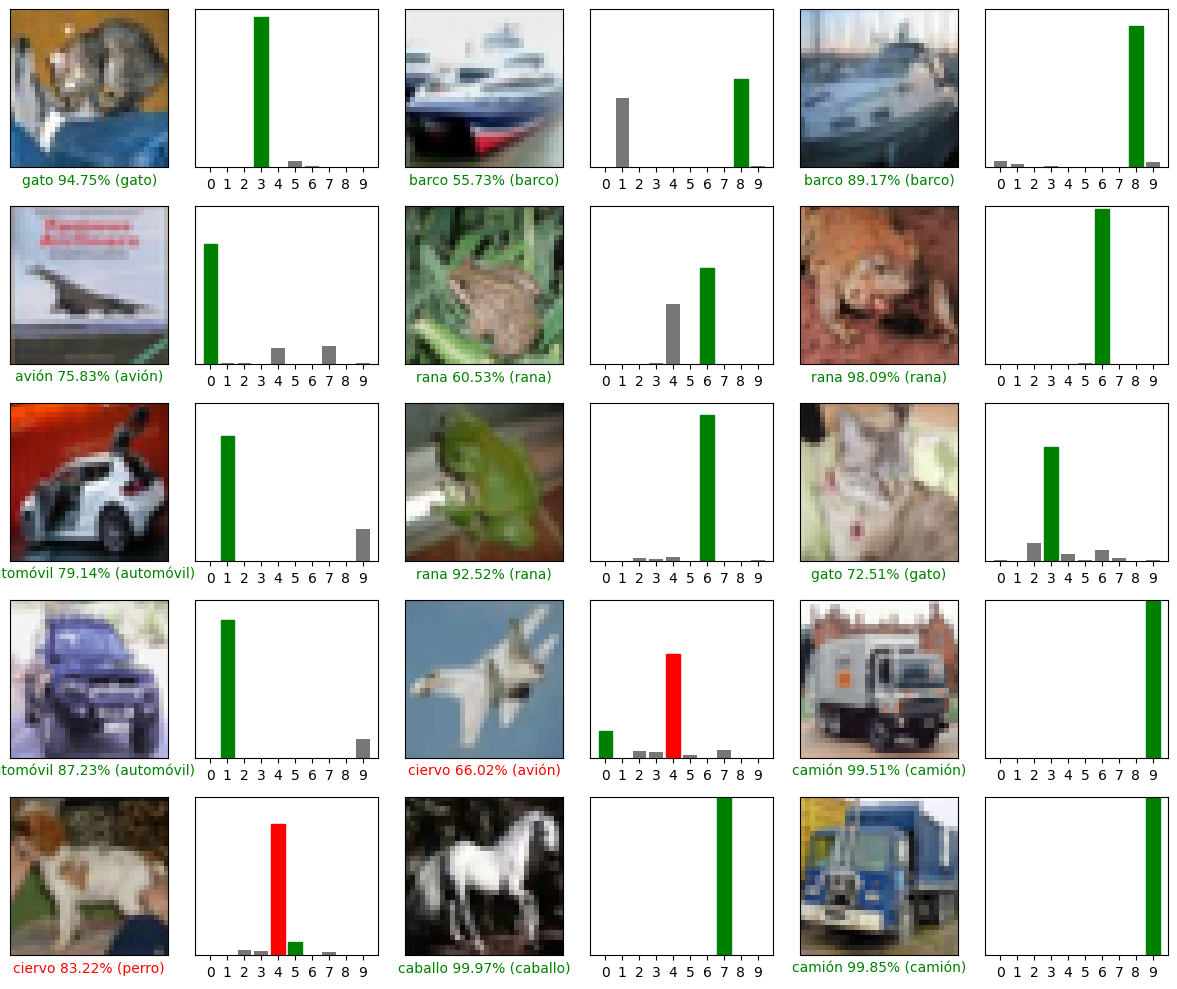

In [9]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

# Mostrar algunas imágenes con sus predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()